# setup

load csvs

In [4]:
import pandas as pd

comments_gh_ai = []
comments_gh_nonai = []
comments_gh = []

comment_gh_ai_csv_path = './hn-comments-gh-ai.csv'
for chunk in  pd.read_csv(comment_gh_ai_csv_path, sep=',', chunksize=2000):
    comments_gh_ai.append(chunk)

comment_gh_nonai_csv_path = './hn-comments-gh-nonai.csv'
for chunk in  pd.read_csv(comment_gh_nonai_csv_path, sep=',', chunksize=2000):
    comments_gh_nonai.append(chunk)

comment_gh_csv_path = './hn-comments-gh.csv'
for chunk in  pd.read_csv(comment_gh_csv_path, sep=',', chunksize=2000):
    comments_gh.append(chunk)

# Concatenate all chunks into a single DataFrame
comments_gh_ai_df = pd.concat(comments_gh_ai)
comments_gh_nonai_df = pd.concat(comments_gh_nonai)
comments_gh_df = pd.concat(comments_gh)

In [2]:
print(f"Total number of stories in {comment_gh_ai_csv_path}: {len(comments_gh_ai_df)}")
print(f"Total number of stories in {comment_gh_nonai_csv_path}: {len(comments_gh_nonai_df)}")
print(f"Total number of stories in {comment_gh_csv_path}: {len(comments_gh_df)}")

Total number of stories in ./hn-comments-gh-ai.csv: 4476
Total number of stories in ./hn-comments-gh-nonai.csv: 47769
Total number of stories in ./hn-comments-gh.csv: 52245


# some stats

In [8]:
import matplotlib.pyplot as plt

def plot_hist_stories(df, name: str):
    # Convert the 'timestamp' column to datetime
    df['comment_time'] = pd.to_datetime(df['comment_time'])

    plt.figure(figsize=(15, 7))
    plt.hist(df['comment_time'], bins=50, edgecolor='black')
    plt.xlabel('Timestamp')
    plt.ylabel('Number of Stories')
    plt.title(name)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.grid(True, alpha=0.8)
    plt.show()

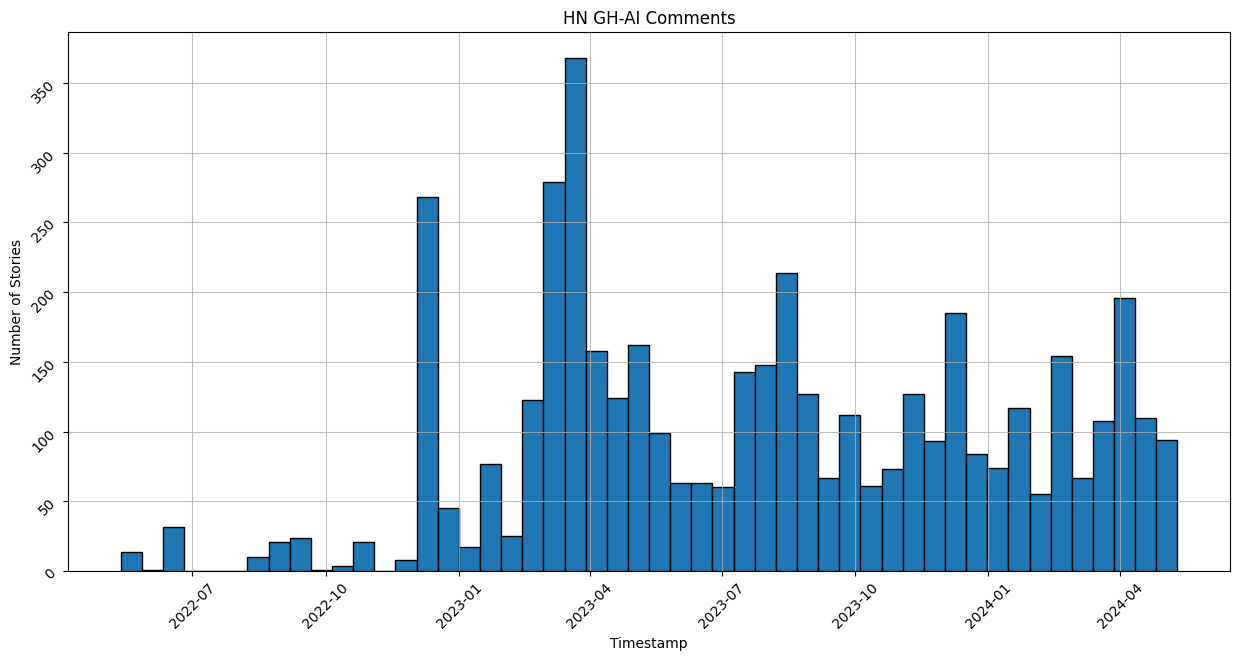

In [9]:
plot_hist_stories(comments_gh_ai_df, 'HN GH-AI Comments')

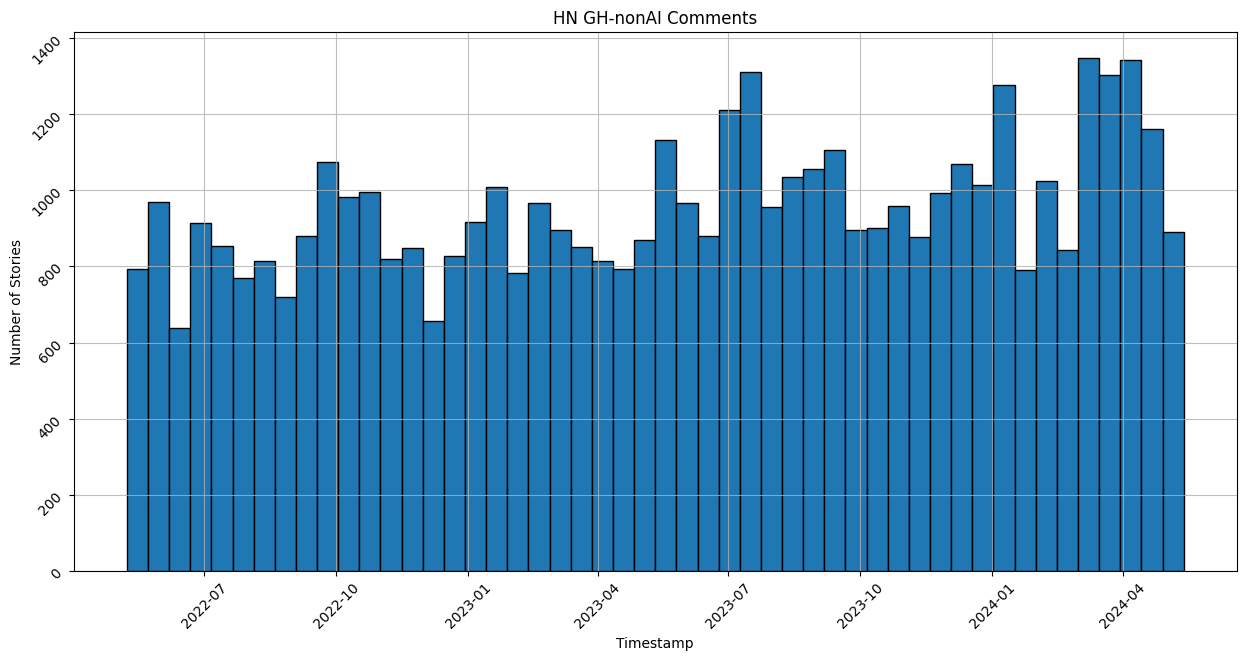

In [10]:
plot_hist_stories(comments_gh_nonai_df, 'HN GH-nonAI Comments')

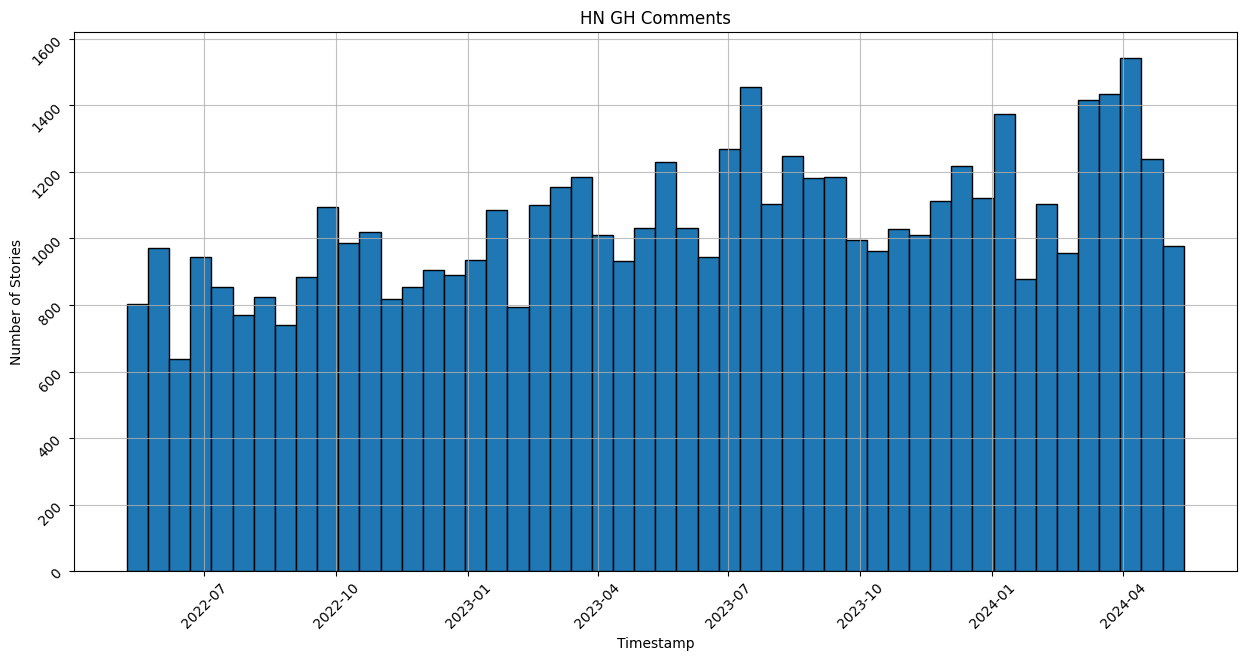

In [11]:
plot_hist_stories(comments_gh_df, 'HN GH Comments')

cross checking 292 comments and new comments

In [3]:
import pandas as pd

comments_292 = []

comment_292_csv_path = './hn-comments-ai-old-ver.csv'
for chunk in  pd.read_csv(comment_292_csv_path, sep=',', chunksize=2000):
    comments_292.append(chunk)
comments_292_df = pd.concat(comments_292)


hypothesis: comments in the new GCP dataset are mainly 0-1 comments per story

In [18]:
df_292 = comments_292_df
df_2000 = comments_gh_ai_df

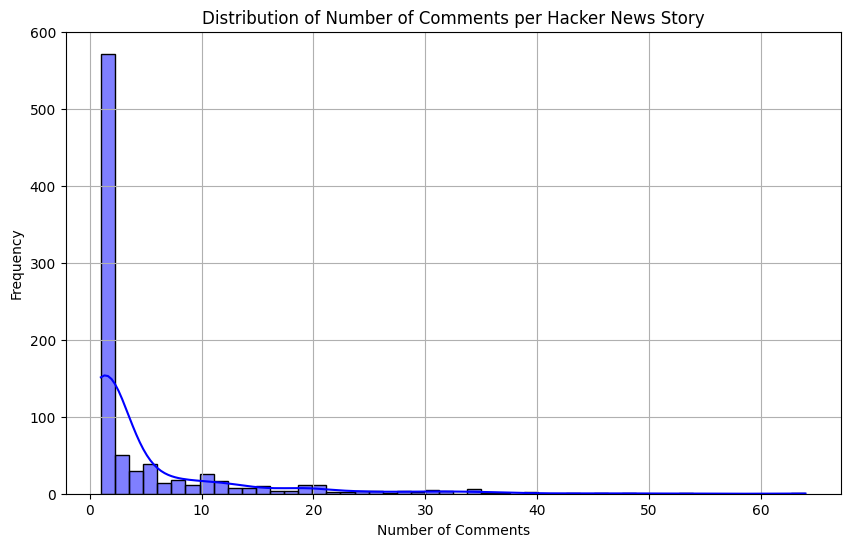

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded with the CSV data

# Step 1: Group by story_id and count the number of comments per story
comments_per_story = df_292.groupby('story_id').size().reset_index(name='comment_count')

# Step 2: Plot the distribution of the number of comments per story
plt.figure(figsize=(10, 6))
sns.histplot(comments_per_story['comment_count'], bins=50, kde=True, color='blue')
plt.title('Distribution of Number of Comments per Hacker News Story')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Step 1: Get the list of comment_id values from df
exclude_comment_ids = df_292['comment_id'].unique()

# Step 2: Filter df2 to exclude rows with comment_id present in df
df2_filtered = df_2000[~df_2000['comment_id'].isin(exclude_comment_ids)]
df2_filtered.to_csv('filtered_df2.csv', index=False)

In [20]:
# Find common story_id between the two datasets
common_stories = set(df_292['comment_id']).intersection(set(df_2000['comment_id']))
print(f"Number of common stories: {len(common_stories)}")

Number of common stories: 4213


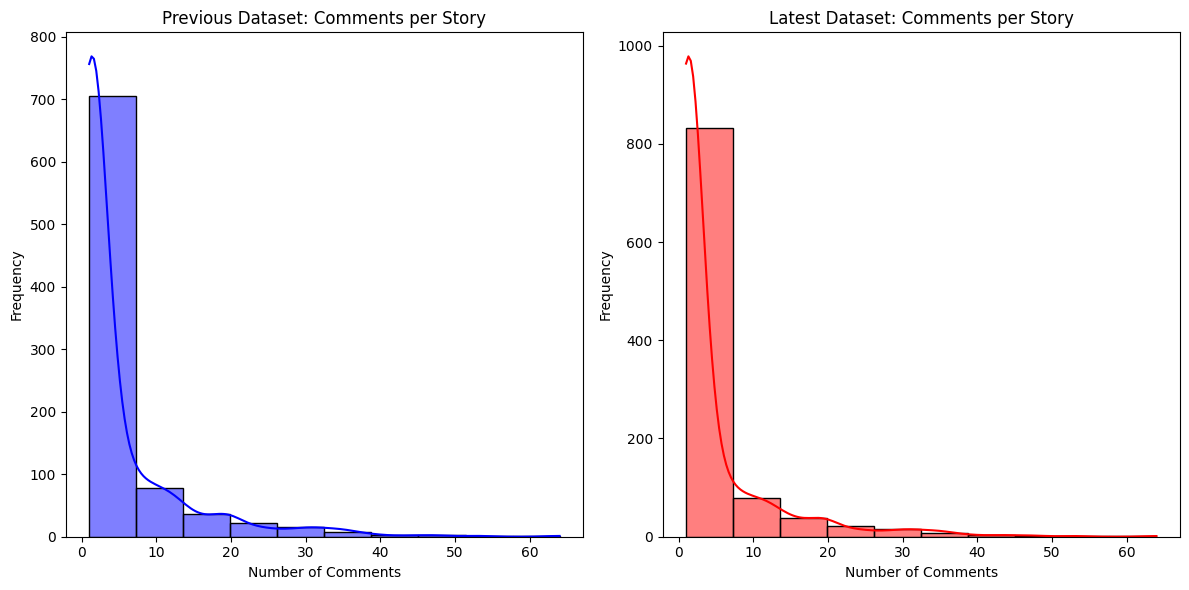

In [30]:
# Calculate comments per story for both datasets
previous_comments_per_story = df_292.groupby('story_id').size()
latest_comments_per_story = df_2000.groupby('story_id').size()

# Plot the distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(previous_comments_per_story, bins=10, kde=True, color='blue')
plt.title('Previous Dataset: Comments per Story')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(latest_comments_per_story, bins=10, kde=True, color='red')
plt.title('Latest Dataset: Comments per Story')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [24]:
# For the previous dataset
previous_comments_per_story = df_292.groupby('story_id').size().reset_index(name='comment_count')
previous_comment_counts_distribution = previous_comments_per_story['comment_count'].value_counts().sort_index()

# For the latest dataset
latest_comments_per_story = df_2000.groupby('story_id').size().reset_index(name='comment_count')
latest_comment_counts_distribution = latest_comments_per_story['comment_count'].value_counts().sort_index()

# Display the results
print("Previous Dataset: Number of stories with 0, 1, 2, etc. comments")
print(previous_comment_counts_distribution)

print("\nLatest Dataset: Number of stories with 0, 1, 2, etc. comments")
print(latest_comment_counts_distribution)

Previous Dataset: Number of stories with 0, 1, 2, etc. comments
comment_count
1     461
2     111
3      50
4      30
5      23
6      16
7      14
8      18
9      11
10     13
11     12
12     16
13      8
14      8
15      4
16      6
17      3
18      4
19     11
20      7
21      4
22      2
23      2
24      3
25      3
26      1
27      1
28      3
29      2
30      2
31      3
32      4
34      2
35      4
36      1
37      1
39      2
43      1
46      1
48      1
53      1
64      1
Name: count, dtype: int64

Latest Dataset: Number of stories with 0, 1, 2, etc. comments
comment_count
1     555
2     139
3      53
4      32
5      23
6      17
7      14
8      18
9      11
10     13
11     12
12     16
13      8
14      8
15      5
16      8
17      3
18      4
19     11
20      7
21      4
22      2
23      2
24      3
25      3
26      1
27      1
28      3
29      2
30      2
31      3
32      4
34      2
35      4
36      1
37      1
39      2
43      2
46      1
48      1

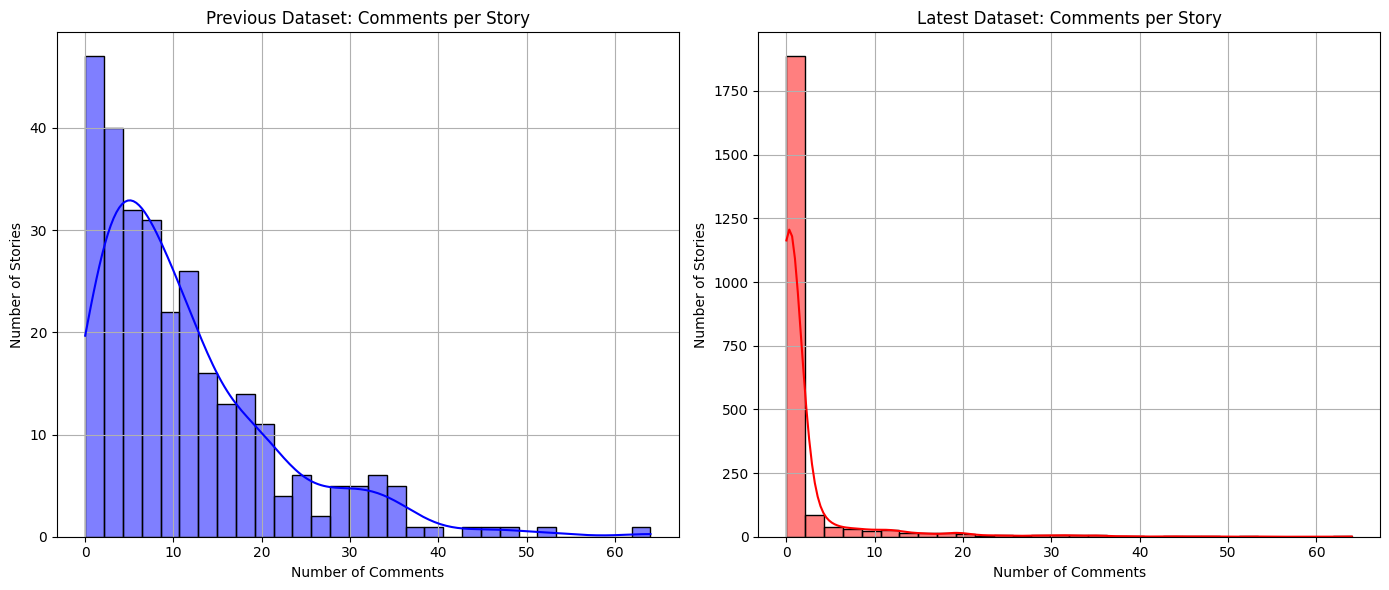

Top 10 Stories with Most Comments (Previous Dataset):
     discussion_id                                              title  \
145       37112741  Azure ChatGPT: Private and secure ChatGPT for ...   
50        35100086  Llama.cpp: Port of Facebook's LLaMA model in C...   
226       38992601              Vanna.ai: Chat with your SQL database   
55        35184985  Show HN: Alpaca.cpp – Run an Instruction-Tuned...   
14        33854638      Show HN: Whole Git repo was made with ChatGPT   
215       38611700  Show HN: Open-source macOS AI copilot using vi...   
17        33872062  Tell HN: Giving ChatGPT access to a real terminal   
109       36041832                   GirlfriendGPT – OSS AI Companion   
137       36933452  Show HN: Khoj – Chat offline with your second ...   
71        35349608  Gpt4all: A chatbot trained on ~800k GPT-3.5-Tu...   

     comment_count  
145           64.0  
50            53.0  
226           48.0  
55            46.0  
14            43.0  
215           39

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming:
df_previous_stories = pd.read_csv('./rq1_stories_github_valid_projs_only_292.csv')
df_latest_stories = pd.read_csv('./hn-stories-gh-ai.csv')
df_previous_comments = df_292
df_latest_comments = df_2000

# Step 1: Count comments per story for both datasets
previous_comment_counts = df_previous_comments.groupby('story_id').size().reset_index(name='comment_count')
latest_comment_counts = df_latest_comments.groupby('story_id').size().reset_index(name='comment_count')

# Step 2: Merge comment counts with story datasets
# For the previous dataset
previous_stories_with_counts = pd.merge(
    df_previous_stories,
    previous_comment_counts,
    left_on='discussion_id',
    right_on='story_id',
    how='left'
).fillna(0)  # Fill NaN (stories with no comments) with 0

# For the latest dataset
latest_stories_with_counts = pd.merge(
    df_latest_stories,
    latest_comment_counts,
    left_on='id',
    right_on='story_id',
    how='left'
).fillna(0)  # Fill NaN (stories with no comments) with 0

# Step 3: Analyze distributions
# Plot histograms for both datasets
plt.figure(figsize=(14, 6))

# Previous dataset
plt.subplot(1, 2, 1)
sns.histplot(previous_stories_with_counts['comment_count'], bins=30, kde=True, color='blue')
plt.title('Previous Dataset: Comments per Story')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Stories')
plt.grid(True)

# Latest dataset
plt.subplot(1, 2, 2)
sns.histplot(latest_stories_with_counts['comment_count'], bins=30, kde=True, color='red')
plt.title('Latest Dataset: Comments per Story')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Stories')
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 4: Identify stories with the most comments and those with 0 or 1 comment
# Stories with the most comments (top 10)
top_10_previous = previous_stories_with_counts.sort_values(by='comment_count', ascending=False).head(10)
top_10_latest = latest_stories_with_counts.sort_values(by='comment_count', ascending=False).head(10)

# Stories with 0 comments
zero_comments_previous = previous_stories_with_counts[previous_stories_with_counts['comment_count'] == 0]
zero_comments_latest = latest_stories_with_counts[latest_stories_with_counts['comment_count'] == 0]

# Stories with 1 comment
one_comment_previous = previous_stories_with_counts[previous_stories_with_counts['comment_count'] == 1]
one_comment_latest = latest_stories_with_counts[latest_stories_with_counts['comment_count'] == 1]

# Display results
print("Top 10 Stories with Most Comments (Previous Dataset):")
print(top_10_previous[['discussion_id', 'title', 'comment_count']])

print("\nTop 10 Stories with Most Comments (Latest Dataset):")
print(top_10_latest[['id', 'title', 'comment_count']])

print("\nStories with 0 Comments (Previous Dataset):")
print(zero_comments_previous[['discussion_id', 'title', 'comment_count']])

print("\nStories with 0 Comments (Latest Dataset):")
print(zero_comments_latest[['id', 'title', 'comment_count']])

print("\nStories with 1 Comment (Previous Dataset):")
print(one_comment_previous[['discussion_id', 'title', 'comment_count']])

print("\nStories with 1 Comment (Latest Dataset):")
print(one_comment_latest[['id', 'title', 'comment_count']])